Look at ASTE profiles

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [36]:
%matplotlib inline

In [2]:
profile_dir='~/canari/users/emmomp/ASTE-profiles'

In [146]:
profile_test=xr.open_dataset(f'{profile_dir}/framstraitmooringuEvN_llc270_18x18_sep2015_ASTE_model.nc')

In [151]:
profile_test=profile_test.set_coords(['prof_depth','prof_date','prof_lon','prof_lat'])

In [152]:
profile_test=profile_test.set_coords(['prof_YYYYMMDD','prof_HHMMSS'])

In [161]:
profile_test.prof_Testim.dropna('iPROF',how='all')

<xarray.DataArray 'prof_Testim' (iPROF: 57629, iDEPTH: 63)> Size: 29MB
array([[-0.157997, -0.021328,  0.368328, ...,       nan,       nan,       nan],
       [ 0.099049,  0.15258 ,  0.287589, ...,       nan,       nan,       nan],
       [-0.242815,  0.132913,  0.268562, ...,       nan,       nan,       nan],
       ...,
       [-1.708289, -1.409815, -1.224258, ...,       nan,       nan,       nan],
       [-1.708632, -1.403891, -1.227921, ...,       nan,       nan,       nan],
       [-1.709058, -1.395586, -1.229118, ...,       nan,       nan,       nan]])
Coordinates:
    prof_depth     (iDEPTH) float64 504B ...
    prof_date      (iPROF) float64 461kB ...
    prof_YYYYMMDD  (iPROF) float64 461kB ...
    prof_HHMMSS    (iPROF) float64 461kB ...
    prof_lon       (iPROF) float64 461kB ...
    prof_lat       (iPROF) float64 461kB ...
Dimensions without coordinates: iPROF, iDEPTH
Attributes:
    long_name:  pot. temp. estimate (e.g. from atlas)
    units:      degree C

In [162]:
profile_test_clean=profile_test.where(np.isfinite(profile_test.prof_Testim.mean('iDEPTH')),drop=True)
profile_test_clean

<xarray.Dataset> Size: 589MB
Dimensions:              (iPROF: 57629, iDEPTH: 63, iINTERP: 1)
Coordinates:
    prof_depth           (iDEPTH) float64 504B ...
    prof_date            (iPROF) float64 461kB 7.312e+05 7.312e+05 ... 7.347e+05
    prof_YYYYMMDD        (iPROF) float64 461kB 2.002e+07 2.002e+07 ... 2.011e+07
    prof_HHMMSS          (iPROF) float64 461kB 1.2e+05 1.2e+05 ... 1.2e+05
    prof_lon             (iPROF) float64 461kB 8.643 8.643 ... -8.106 -8.106
    prof_lat             (iPROF) float64 461kB 78.84 78.84 78.84 ... 78.84 78.84
Dimensions without coordinates: iPROF, iDEPTH, iINTERP
Data variables: (12/32)
    prof_descr           (iPROF) object 461kB b'0008.64;78.839;M0001;y2002010...
    prof_basin           (iPROF) float64 461kB 21.0 21.0 21.0 ... 21.0 21.0 21.0
    prof_point           (iPROF) float64 461kB 9.257e+05 9.257e+05 ... 9.289e+05
    prof_T               (iPROF, iDEPTH) float64 29MB nan nan nan ... nan nan
    prof_Tweight         (iPROF, iDEPTH) float64 29MB 0.0 0.0 0.0 ... 0.0 0.0
    prof_Testim          (iPROF, iDEPTH) float64 29MB -0.158 -0.02133 ... nan
    ...                   ...
    prof_interp_YCNINJ   (iPROF) float64 461kB 79.6 79.6 79.6 ... 79.17 79.17
    prof_interp_i        (iPROF, iINTERP) float64 461kB 12.0 12.0 ... 15.0 15.0
    prof_interp_j        (iPROF, iINTERP) float64 461kB 7.0 7.0 ... 15.0 15.0
    prof_interp_lon      (iPROF, iINTERP) float64 461kB 8.592 8.592 ... -8.195
    prof_interp_lat      (iPROF, iINTERP) float64 461kB 78.83 78.83 ... 78.88
    prof_interp_weights  (iPROF, iINTERP) float64 461kB 1.0 1.0 1.0 ... 1.0 1.0
Attributes:
    Format:   The contents of this MITprof file were processed \nusing the MI...
    date:     31-Jul-2019

In [ ]:
profile_test

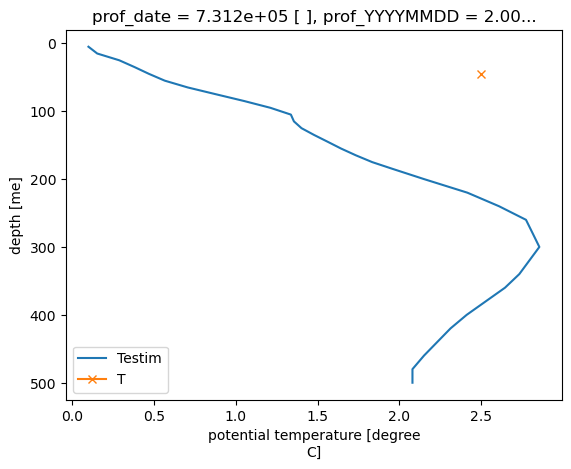

In [166]:
profile_test_clean.prof_Testim[1].plot(y='prof_depth',yincrease=False)
profile_test_clean.prof_T[1].plot(y='prof_depth',yincrease=False,marker='x')
plt.legend(['Testim','T'])

In [164]:
profile_test_clean.prof_T[0].load()

<xarray.DataArray 'prof_T' (iDEPTH: 63)> Size: 504B
array([       nan,        nan,        nan,        nan, 3.13990411,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan])
Coordinates:
    prof_depth     (iDEPTH) float64 504B 5.0 15.0 25.0 ... 2.7e+03 2.8e+03
    prof_date      float64 8B 7.312e+05
    prof_YYYYMMDD  float64 8B 2.002e+07
    prof_HHMMSS    float64 8B 1.2e+05
    prof_lon       float64 8B 8.643
    prof_lat       float64 8B 78.84
Dimensions without coordinates: iDEPTH
Attributes:
    long_name:  potential temperature
    units:      degree C

In [138]:
profile_test.prof_YYYYMMDD[0].load()

<xarray.DataArray 'prof_YYYYMMDD' ()> Size: 8B
array(20140705.)
Coordinates:
    prof_date      float64 8B 7.358e+05
    prof_YYYYMMDD  float64 8B 2.014e+07
    prof_HHMMSS    float64 8B 1.2e+05
    prof_lon       float64 8B -51.69
    prof_lat       float64 8B 52.82
Attributes:
    long_name:  year (4 digits), month (2 digits), day (2 digits)
    units:

In [148]:
profile_test.prof_T.dropna('iPROF',how='all')

<xarray.DataArray 'prof_T' (iPROF: 70621, iDEPTH: 63)> Size: 36MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: iPROF, iDEPTH
Attributes:
    long_name:  potential temperature
    units:      degree C

In [149]:
profile_test

<xarray.Dataset> Size: 791MB
Dimensions:              (iDEPTH: 63, iPROF: 77269, iINTERP: 1)
Dimensions without coordinates: iDEPTH, iPROF, iINTERP
Data variables: (12/38)
    prof_depth           (iDEPTH) float64 504B ...
    prof_descr           (iPROF) |S30 2MB ...
    prof_date            (iPROF) float64 618kB ...
    prof_YYYYMMDD        (iPROF) float64 618kB ...
    prof_HHMMSS          (iPROF) float64 618kB ...
    prof_lon             (iPROF) float64 618kB ...
    ...                   ...
    prof_interp_YCNINJ   (iPROF) float64 618kB ...
    prof_interp_i        (iPROF, iINTERP) float64 618kB ...
    prof_interp_j        (iPROF, iINTERP) float64 618kB ...
    prof_interp_lon      (iPROF, iINTERP) float64 618kB ...
    prof_interp_lat      (iPROF, iINTERP) float64 618kB ...
    prof_interp_weights  (iPROF, iINTERP) float64 618kB ...
Attributes:
    Format:   The contents of this MITprof file were processed \nusing the MI...
    date:     31-Jul-2019

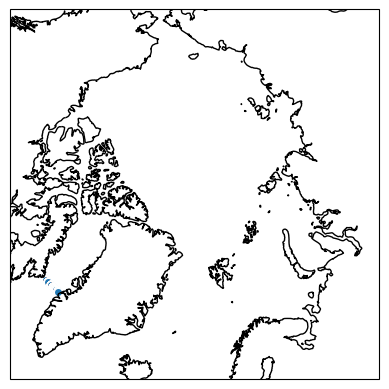

In [121]:
import cartopy.crs as ccrs
#proj=ccrs.Orthographic(central_longitude=-30,central_latitude=30)
proj=ccrs.NorthPolarStereo()
ax=plt.subplot(projection=proj)
profile_test.plot.scatter(x='prof_lon',y='prof_lat',ax=ax,transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180,180,65,90],ccrs.PlateCarree())